<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/6.System-stability/estabilidade_resposta_frequencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

# Instalar e importar as bibliotecas

In [53]:
!pip install control -qq

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import control as ct

# Sistema de controle sob análise

In [123]:
# Estimativa inicial
Kc = 1.0 # Ganho proporcional

# Funções fornecidas
Gp = 2.5*ct.tf(1,[10,1])*ct.tf(1,[4,1]) # Processo de segunda ordem superamortecido
Gtd = ct.tf(*ct.pade(2,1)) # Tempo morto: aproximação de Padé 1/1
Gm = ct.tf(1,[1,1])*Gtd # Medidor com tempo-morto
Gc = Kc # Controlador proporcional

# Sistema em malha aberta
Gol = Gc*Gp*Gm

## Análise da malha aberta

In [124]:
# Verificando os polos
p = ct.poles(Gol)
print('Polos da malha aberta')
for i in range(len(p)):
    print(f'Polo {i+1}: {p[i]}')

Polos da malha aberta
Polo 1: (-0.9999999999999969+3.512279132147375e-08j)
Polo 2: (-0.9999999999999969-3.512279132147375e-08j)
Polo 3: (-0.2499999999999993+0j)
Polo 4: (-0.10000000000000009+0j)


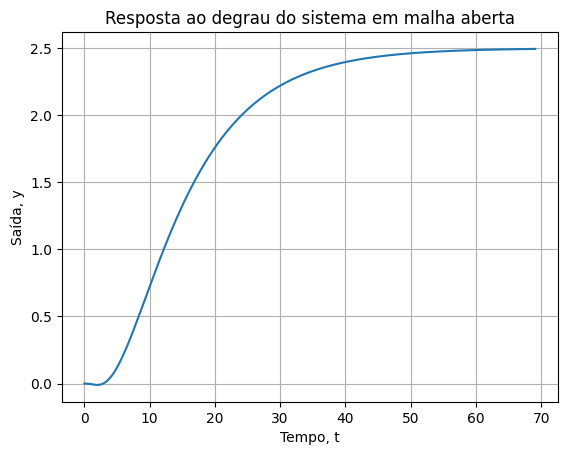

In [125]:
t, y = ct.step_response(Gol)
plt.plot(t,y)
plt.xlabel('Tempo, t')
plt.ylabel('Saída, y')
plt.title('Resposta ao degrau do sistema em malha aberta')
plt.grid();

## Análise da malha fechada usando a biblioteca "control"

In [126]:
Gcl = Gc*Gp/(1+Gol) # Função de transferência da malha fechada
Gcl = ct.minreal(Gcl) # Eliminando polos e zeros repetidos

2 states have been removed from the model


In [127]:
# Verificando os polos
p = ct.poles(Gcl)
print('Polos da malha fechada')
for i in range(len(p)):
    print(f'Polo {i+1}: {p[i]}')

Polos da malha fechada
Polo 1: (-1.1028274269348612+0.3537872734108585j)
Polo 2: (-1.1028274269348612-0.3537872734108585j)
Polo 3: (-0.07217257306513805+0.244993426595735j)
Polo 4: (-0.07217257306513805-0.244993426595735j)


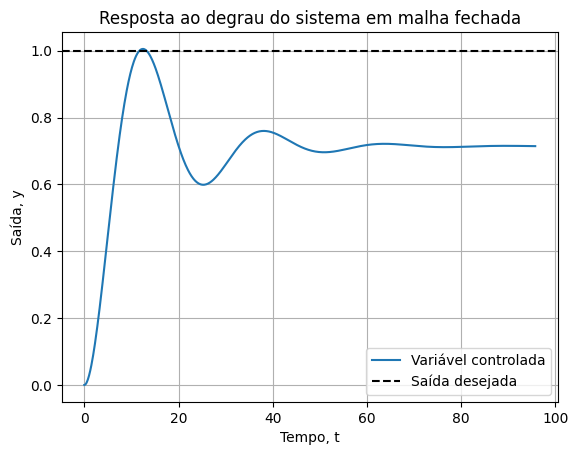

In [128]:
t, y = ct.step_response(Gcl)
plt.plot(t, y, label='Variável controlada' )
plt.axhline(y=1, color='k', linestyle='--', label='Saída desejada')
plt.title('Resposta ao degrau do sistema em malha fechada')
plt.xlabel('Tempo, t')
plt.ylabel('Saída, y')
plt.legend()
plt.grid();

### Lugar das raízes

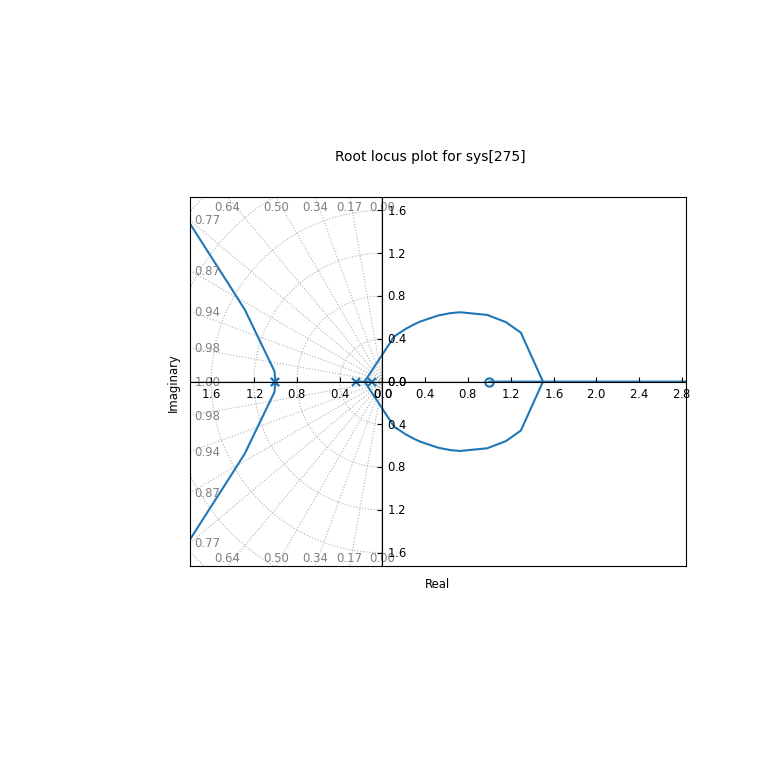

In [129]:
ct.root_locus(Gol);

### Diagrama de Bode

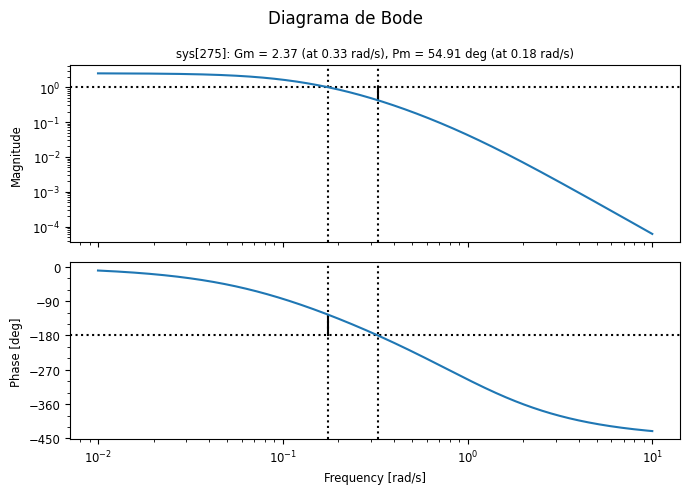

In [144]:
plt.figure(figsize=(7,5))
ct.bode_plot(Gol, display_margins=True);
plt.suptitle('Diagrama de Bode');

### Cálculo das margens MG e MF

In [131]:
MG, MF, wc, wg = ct.margin(Gol)

print(f'Ganho --> MG: {MG:2.4f}, wc: {wc:1.4f} rad/min')
print(f'Fase --> MF: {MF:2.4f}, wp: {wg:1.4f} rad/min')

Ganho --> MG: 2.3727, wc: 0.3273 rad/min
Fase --> MF: 54.9073, wp: 0.1751 rad/min


### Cálculo do ganho marginal, $K_u$

In [132]:
Ku = MG*Kc
print(f'Ganho marginal --> Ku = {Ku: 1.4f}')

Ganho marginal --> Ku =  2.3727


## Análise da malha fechada usando o método "fsolve"

Vamos fazer juntos!


# Simulação da malha fechada com $Kc = Ku/2$.

In [ ]:
# Novo parametro
Kc = Ku/2